**Neural Network Classification with Pytorch.**

Classification is a problem that helps to predict with something is one thing or another.

In [268]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [269]:
#Make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [270]:
len(X), len(y)

(1000, 1000)

In [271]:
print(f"First 5 samples X: {X[:5]}")
print(f"First 5 samples of Y : {y[:5]}")

First 5 samples X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y : [1 1 1 1 0]


In [272]:
#Make DataFrame of Circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [273]:
circles.label.value_counts()

,count
label,
1,500
0,500


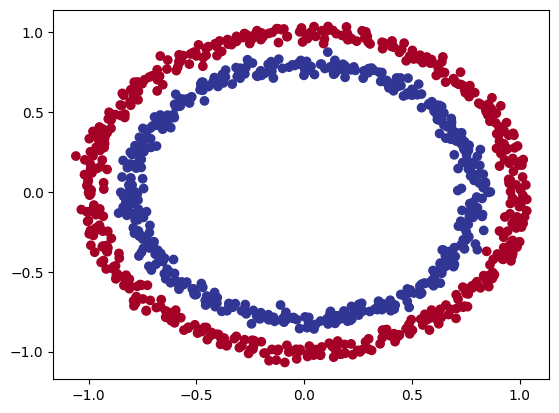

In [274]:
#Visualize, Vizualize, Vizualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Our Toy Dataset**

The data we are working with is mostly known as a toy Dataset. A dataset that is small enough to experience on but still sizeable enough to practice the fundamentals.

**Check input and output shapes**

In [275]:
X.shape, y.shape

((1000, 2), (1000,))

In [276]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [277]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and target label: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and y_sample shape: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and target label: 1
Shape for one sample of X: (2,) and y_sample shape: ()


**Turn data into tensors and create train and test splits**

In [278]:
import torch
torch.__version__

'2.6.0+cu124'

In [279]:
type(X)

numpy.ndarray

In [280]:
#Turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [281]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [282]:
torch.manual_seed(42)

In [283]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of the data will be test and 80% will be train
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

**Building a model**

It will help to classify Blue and Red dots.
To do that, we will have to :


1.   Setup device agnostic code so our code will run on an accelerator(GPU) if there is one
2.   Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop



In [284]:
#Import Pytorch and nn

import torch
from torch import nn

#Make device agnostic code:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [285]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

Now we have set up device agnostic code, let us create a model that:

1. Subclass `nn.Module` (almost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`



In [286]:
#1. Construct the model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #Takes in 5 features from the previous layer and bring out 1 feature

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

  #4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [287]:
device

'cuda'

In [288]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [289]:
#Let's replicate the model above using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [290]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [291]:
#Make some predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 test labels: {y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
First 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [292]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

**Setup loss function and optimizer**

Which loss function or optimmizer should you use?
Again.... This is a problem specific task.
For example for regression, we might want MAE or MSE (Mean absolute error, Mean Squared error)
For Classification we might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* the models predictions are.



In [293]:
#Setup a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()  #This has the sigmoid activation function built-in

#Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [294]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [295]:
#Calculate accuracy: Out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100

  return acc

Training our model:

We are going first to build the training loop
1. Forward pass
2. Calculate the Loss
3. Optimizer zero grad
4. Loss backward (Backpropagation)
5. Optimizer step(Gradient Descent)

Going from raw logits *to* predition probabilities *to* prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into prediction probabilities by passing them to some kind of activation function (eg. Sigmoid for binary classification and softmax for multiclass classification)

Then we can can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [296]:
#View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  test_logits = model_0(X_test.to(device))
test_logits[:5]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [297]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [298]:
#Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(test_logits)
y_pred_probs[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

- y_pred_probs >= 0.5, y=1 (class 1)
- y_pred_probs < 0.5, y=0 (class 0)

In [299]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#in Full (logits -> pred probs -> pred labels)
# The problem was on this line, X_test.to(device)[:5] was creating a tensor of shape [5, 2], it was changed to X_test.to(device) to match y_preds shape.
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.], device='cuda:0')

**Building a training loop**

In [300]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  ###Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

  #2. Calculate the loss and accuracy as we have created a function for that above

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (Backpropagation)
  loss.backward()

  #5. Optimizer step (Gradient descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    #Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796 | Accuracy: 51.88% | Test Loss: 0.69440 | Test Accuracy: 58.00%
Epoch: 10 | Loss: 0.69590 | Accuracy: 51.25% | Test Loss: 0.69305 | Test Accuracy: 53.00%
Epoch: 20 | Loss: 0.69490 | Accuracy: 51.62% | Test Loss: 0.69254 | Test Accuracy: 49.50%
Epoch: 30 | Loss: 0.69435 | Accuracy: 51.12% | Test Loss: 0.69236 | Test Accuracy: 49.50%
Epoch: 40 | Loss: 0.69401 | Accuracy: 50.88% | Test Loss: 0.69232 | Test Accuracy: 51.00%
Epoch: 50 | Loss: 0.69378 | Accuracy: 50.25% | Test Loss: 0.69234 | Test Accuracy: 50.00%
Epoch: 60 | Loss: 0.69362 | Accuracy: 50.00% | Test Loss: 0.69239 | Test Accuracy: 51.50%
Epoch: 70 | Loss: 0.69351 | Accuracy: 50.25% | Test Loss: 0.69246 | Test Accuracy: 51.00%
Epoch: 80 | Loss: 0.69342 | Accuracy: 49.88% | Test Loss: 0.69254 | Test Accuracy: 50.00%
Epoch: 90 | Loss: 0.69336 | Accuracy: 49.88% | Test Loss: 0.69262 | Test Accuracy: 53.00%
Epoch: 100 | Loss: 0.69331 | Accuracy: 49.25% | Test Loss: 0.69271 | Test Accuracy: 53.00%
Epoch: 110

4. Make prediction and evaluate the model

From the metrics it looks like our model is not learning anything.
So, to inspect that, let us make predictions and make them visual.
In other words, let us visualize, visualize, visualize.

We are going to import the function called plot decision boundary.

In [301]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


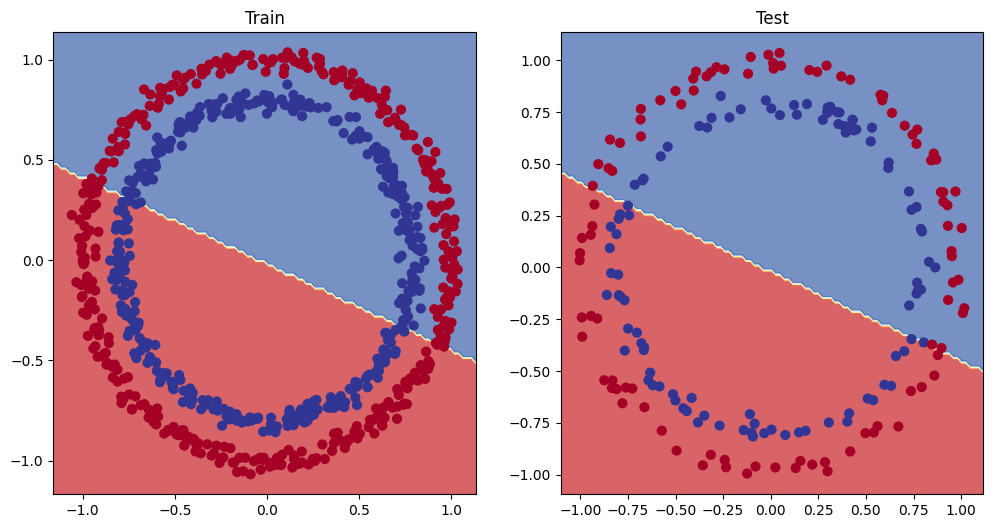

In [302]:
#Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


# Improving model (from a model perspective):

- Add more layers - give the model more chances to learn about patterns in th data
- Add more hidden units - go from 5 hidden units to 10 hidden units
- Fit for longer
- Change the optimization function
- Change the learning rate
- change the loss function

These options are all from a model's perspective because the change will be applied on the model itself and not on the dataset.
And since these options are all values, as a machine learning engineer, I can call these **hyperparameters**

In [303]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=10) #Takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) #Takes in 5 features from the previous layer and bring out 1 feature

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    #z = self.layer_1(x)
    #z = torch.relu(z)
    #z = self.layer_2(z)
    #z = torch.relu(z)

    return self.layer_3(self.layer_2(self.layer_1(x))) #This way of writing operations speeds up the process

#Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [304]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0796, -0.2678],
                      [ 0.4837, -0.4847],
                      [-0.3285, -0.1960],
                      [-0.4351,  0.0318],
                      [-0.6787,  0.6935]])),
             ('0.bias', tensor([-0.6069,  0.5210,  0.1150, -0.2191,  0.4239])),
             ('1.weight',
              tensor([[ 0.0331,  0.2036, -0.0446, -0.1426,  0.2221]])),
             ('1.bias', tensor([-0.2053]))])

In [305]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [306]:

#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)
#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ###Training
  model_1.train()

  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #to go from logits to prediction probabilities to predicted labels

  #Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #2. Optimizer zero grad
  optimizer.zero_grad()

  #3. Loss backward
  loss.backward()

  #4. Optimizer step (gradient descent)
  optimizer.step()

  #Testing our model
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Accuracy: 50.88% | Test Loss: 0.69261 | Test Accuracy: 51.00%
Epoch: 10 | Loss: 0.69369 | Accuracy: 50.25% | Test Loss: 0.69270 | Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69351 | Accuracy: 50.12% | Test Loss: 0.69283 | Test Accuracy: 49.50%
Epoch: 30 | Loss: 0.69339 | Accuracy: 50.50% | Test Loss: 0.69297 | Test Accuracy: 48.00%
Epoch: 40 | Loss: 0.69329 | Accuracy: 50.38% | Test Loss: 0.69310 | Test Accuracy: 49.00%
Epoch: 50 | Loss: 0.69322 | Accuracy: 49.88% | Test Loss: 0.69324 | Test Accuracy: 50.00%
Epoch: 60 | Loss: 0.69317 | Accuracy: 49.38% | Test Loss: 0.69336 | Test Accuracy: 51.50%
Epoch: 70 | Loss: 0.69312 | Accuracy: 49.38% | Test Loss: 0.69348 | Test Accuracy: 50.50%
Epoch: 80 | Loss: 0.69309 | Accuracy: 50.12% | Test Loss: 0.69359 | Test Accuracy: 50.00%
Epoch: 90 | Loss: 0.69307 | Accuracy: 50.50% | Test Loss: 0.69370 | Test Accuracy: 48.50%
Epoch: 100 | Loss: 0.69305 | Accuracy: 50.38% | Test Loss: 0.69379 | Test Accuracy: 48.00%
Epoch: 110

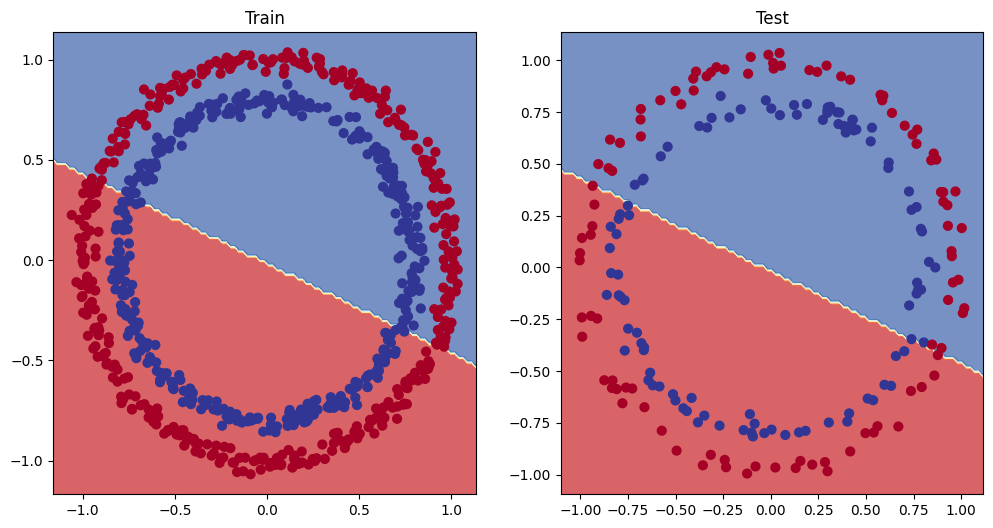

In [307]:
#Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


# Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [308]:
#Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [309]:
#Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:] #Fixed: using correct slicing for y_test_regression

#check the lenghts of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

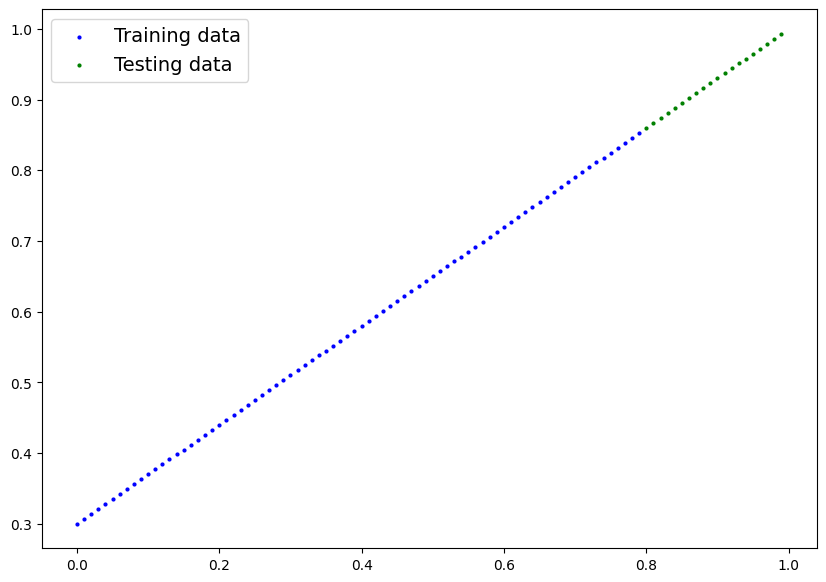

In [310]:
plot_predictions(
    train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    predictions=None
)

In [311]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [312]:
X_train_regression[:5], y_train_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

**We have then to change the number of input feauture in our architecture for classification, Since a regression has just one feauture as input.**

In [313]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [314]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [315]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 1000

#put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


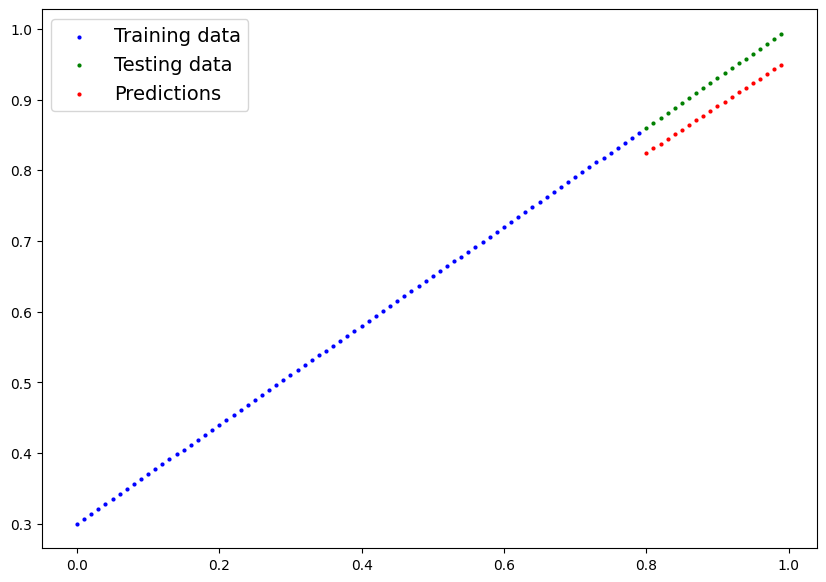

In [316]:
#Let us test the predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression.to(device))

# Move data to CPU before plotting
X_train_regression = X_train_regression.cpu()
y_train_regression = y_train_regression.cpu()
X_test_regression = X_test_regression.cpu()
y_test_regression = y_test_regression.cpu()  # Changed line: Directly move the tensor to CPU
y_preds = y_preds.cpu()

#Plot predictions
plot_predictions(
    train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression,
    predictions=y_preds
)

# Non-linear Activation

We will try to change the activation function in classification so that our accuracy will be improved.

In our previous trial in training, we were using a linear function which could only give a line. We cannot create a linear pattern to predict if something is a pizza or not, there cannot be a linear sequence to code a Pizza.

**Recreating non-linear data (Red and Blue circles)**

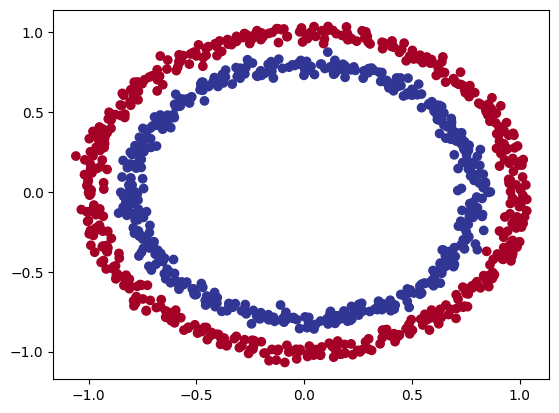

In [317]:
#Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [318]:
#convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#Building a non-linear model

- Linear -> straight line

- Non-linear -> non-straight line

Artificial Neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [319]:
#Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=20)
    self.layer_2 = nn.Linear(in_features=20, out_features=20)
    self.layer_3 = nn.Linear(in_features=20, out_features=20)
    self.layer_4 = nn.Linear(in_features=20, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    #return self.layer_3(self.layer_2(self.layer_1(x)))
    #return self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=20, bias=True)
  (layer_4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [320]:
#Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(),
                            lr=0.1)

#Train the model with non-linearity

In [321]:
#Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#start the training loop
for epoch in range(epochs):
  model_3.train()

  #1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #Loss Backward
  loss.backward()

  #Optimizer step (gradient descent)
  optimizer.step()

  #Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  #Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69606 | Accuracy: 50.00% | Test Loss: 0.72672 | Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.00528 | Accuracy: 100.00% | Test Loss: 0.00668 | Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.00201 | Accuracy: 100.00% | Test Loss: 0.00276 | Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00112 | Accuracy: 100.00% | Test Loss: 0.00181 | Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00074 | Accuracy: 100.00% | Test Loss: 0.00118 | Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00053 | Accuracy: 100.00% | Test Loss: 0.00089 | Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00040 | Accuracy: 100.00% | Test Loss: 0.00071 | Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00031 | Accuracy: 100.00% | Test Loss: 0.00061 | Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00025 | Accuracy: 100.00% | Test Loss: 0.00051 | Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00021 | Accuracy: 100.00% | Test Loss: 0.00044 | Test Accuracy: 100.00%


**Evaluating our model trained with non-linear activation functions**

In [322]:
#Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

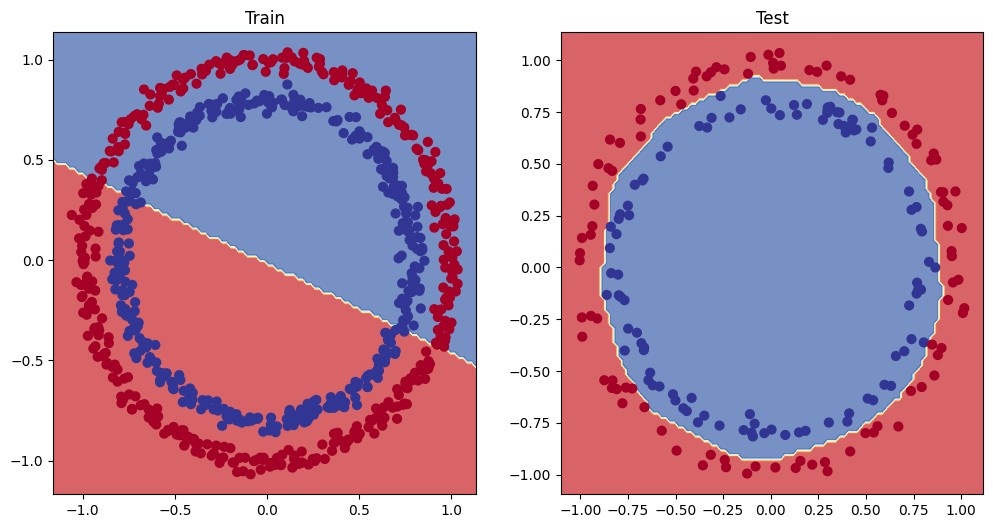

In [323]:
#Plot the decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
#

**Challenge:** Can we improve model_3 to do better than 80% accuracy on the test data ?

**Spoiler Alert: I have managed to improve the accuracy up to 100% ✌ by changing the optimization function from SGD to Adam, by adding another layer, and adding the number of output features for each of the Hidden layers**

#Replicaticating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it tools to discover patterns in data and it tries to figure out the patterns on its own.

And the tools are linear and non-linear functions

In [324]:
#create a Tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [325]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

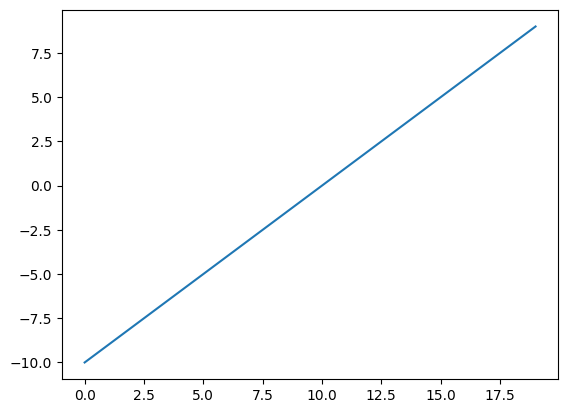

In [326]:
plt.plot(A)

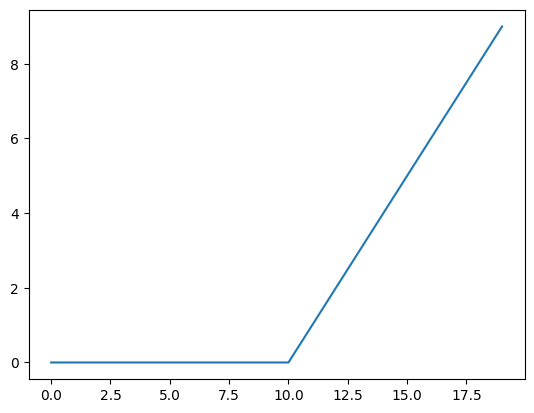

In [327]:
plt.plot(torch.relu(A))

In [328]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

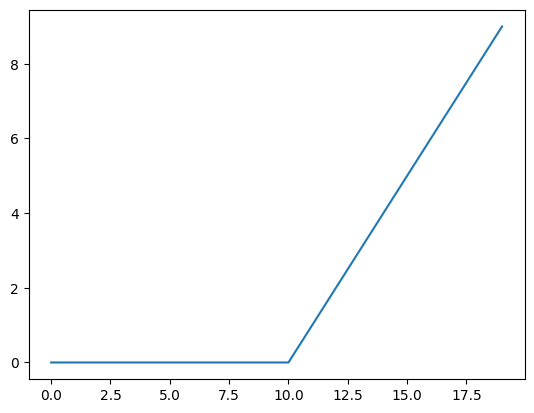

In [329]:
plt.plot(relu(A))

#Now let us do the same with Sigmoid

In [330]:
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

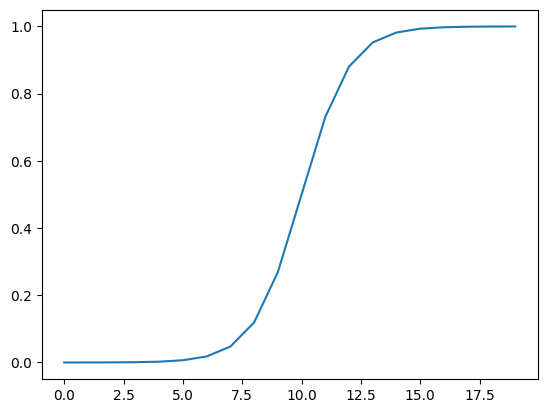

In [331]:
plt.plot(torch.sigmoid(A))

##Putting all together with a multiclass classifiction Problem

- Binary classification = one thing or another (cat vs. Dog, spam vs not a Spam)

- Multiclass classification = more than one thing or another (cat vs. dog vs. chicken)

#Creating a toy multi-class dataset

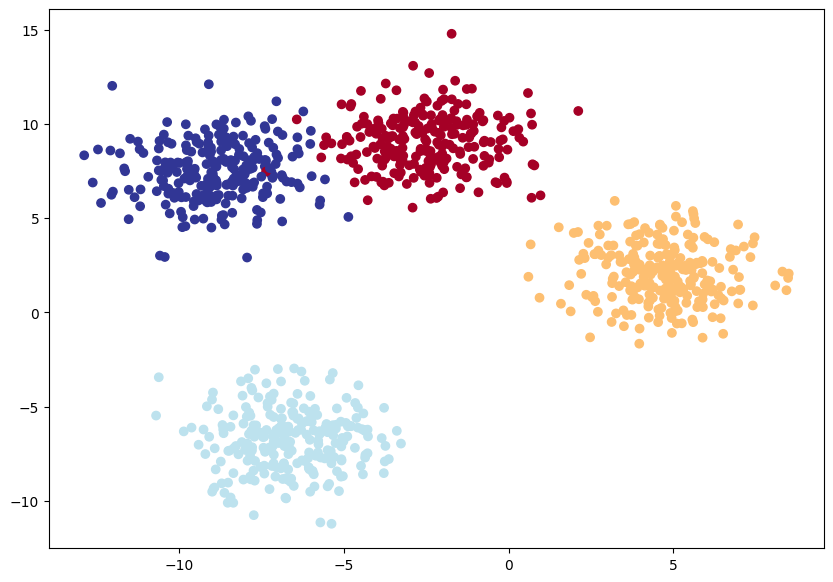

In [332]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Create some data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5, #Give the clusters a little shake up. Add the randomness
                            random_state=RANDOM_SEED)

#1. create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
#2. Turn into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

#4. Plot data (visualize, visualize, Visualize)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

###Building a Multiclass classification model in Pytorch

In [333]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [334]:
#Build a multiclass classification model
class BlobModel(nn.Module): # Changed from nn.module to nn.Module
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(), #Our dataset can be linearly separable. Reason why it is not mandatory to include the non-linearity. But if it could be Pizza and anything that cannot be linearly represented, we have to put the ReLU
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x): # Indentation corrected
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [335]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [336]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

##Create a loss function and an optimizer for a multi-class classification model

In [337]:
#create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

#create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) #Learning rate is a hyperparameter

##Getting prediction for a multi-class Pytorch model

In order to evaluate, train and test our model, we need to convert our model's outputs (logits) to prediction prbabilities and them to predictiom labels

In [338]:
#Let us get some raw output of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [339]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])
print(y_pred_probs[:5])


tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [340]:
#convert our model's prediction labels
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
y_pred_labels

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [341]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

##Create a training loop and testing loop for a multiclass model

In [342]:
#Fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 100

#Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#Loop through data
for epoch in range(epochs): # Changed epochs to epoch
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train) # This line caused the error. BCEWithLogitsLoss expects a single output value, but the model outputs 4 values (one for each class). This leads to the shape mismatch.
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Removed the duplicate optimizer steps

  ###Testing
  model_4.eval()
  with torch.inference_mode(): # Changed torch.inference_model() to torch.inference_mode()
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324 | Accuracy: 65.50% | Test Loss: 0.57861 | Test Accuracy: 95.50%
Epoch: 10 | Loss: 0.14398 | Accuracy: 99.12% | Test Loss: 0.13037 | Test Accuracy: 99.00%
Epoch: 20 | Loss: 0.08062 | Accuracy: 99.12% | Test Loss: 0.07216 | Test Accuracy: 99.50%
Epoch: 30 | Loss: 0.05924 | Accuracy: 99.12% | Test Loss: 0.05133 | Test Accuracy: 99.50%
Epoch: 40 | Loss: 0.04892 | Accuracy: 99.00% | Test Loss: 0.04098 | Test Accuracy: 99.50%
Epoch: 50 | Loss: 0.04295 | Accuracy: 99.00% | Test Loss: 0.03486 | Test Accuracy: 99.50%
Epoch: 60 | Loss: 0.03910 | Accuracy: 99.00% | Test Loss: 0.03083 | Test Accuracy: 99.50%
Epoch: 70 | Loss: 0.03643 | Accuracy: 99.00% | Test Loss: 0.02799 | Test Accuracy: 99.50%
Epoch: 80 | Loss: 0.03448 | Accuracy: 99.00% | Test Loss: 0.02587 | Test Accuracy: 99.50%
Epoch: 90 | Loss: 0.03300 | Accuracy: 99.12% | Test Loss: 0.02423 | Test Accuracy: 99.50%


##Making and evaluating predictions with a PyTorch multi-class model

In [343]:
#Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [344]:
#Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [345]:
#Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

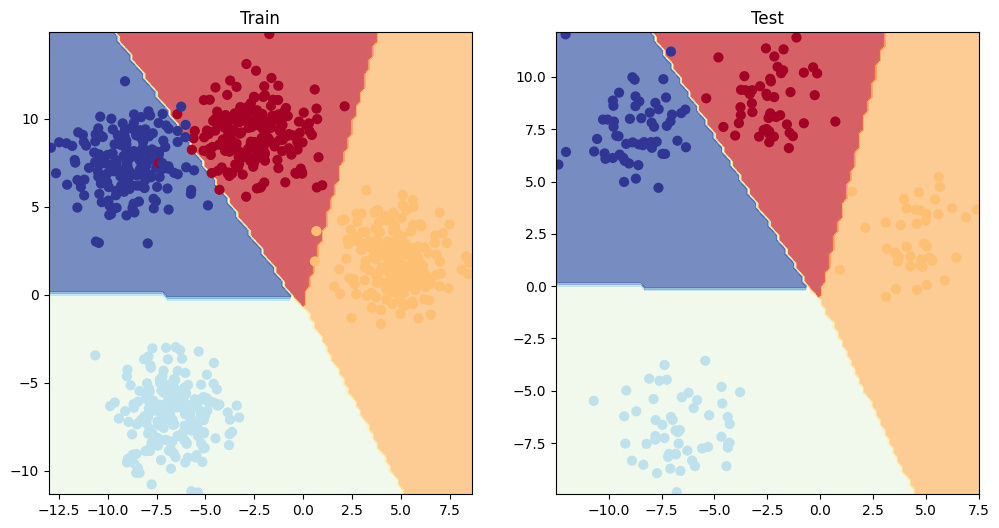

In [346]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

##A few more classification metrics (To evaluate our classification models)

- Accuracy
- Precision
- Recall
- Pi-score
- Confusion matrix
- Classification reports

In [347]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [350]:
from torchmetrics import Accuracy

#Setup metric, specifying the task as 'multiclass' and providing num_classes
# num_classes is set to 4 as there are 4 distinct classes in our dataset.
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

#Calculate the accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')